This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

__The Goal__

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.




In [58]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [59]:
Income = pd.read_csv("/Users/bahtinur/Downloads/adult.csv")

In [60]:
Income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


__Missing Goals__

At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country". 
Nan values were as ? in data. Hence we fix this with most frequent element(mode) in the entire dataset. It generalizes well, as we will see with the accuracy of our classifiers

In [61]:
Income['native-country'] = Income['native-country'].replace('?',np.nan)
Income['workclass'] = Income['workclass'].replace('?',np.nan)
Income['occupation'] = Income['occupation'].replace('?',np.nan)

In [62]:
Income['workclass'].fillna(Income['workclass'].mode()[0], inplace=True)
Income['native-country'].fillna(Income['native-country'].mode()[0], inplace=True)
Income['occupation'].fillna(Income['occupation'].mode()[0], inplace=True)


In [63]:
Income.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [64]:
Income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [95]:
Income['education-num'] = Income['educational-num']
del Income['educational-num']

In [96]:
Income.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education-num
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382,10.078089
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444,2.570973
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000,9.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000,10.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000,12.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000,16.000000


In [65]:
Income.describe(include=["O"])


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


In [90]:
Income['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [91]:
Income['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [108]:
#reading each column entry
print('workclass',Income.workclass.unique())
print('education',Income.education.unique())
print('marital-status',Income['marital-status'].unique())
print('occupation',Income.occupation.unique())
print('relationship',Income.relationship.unique())
print('race',Income.race.unique())
print('gender',Income.gender.unique())
print('native-country',Income['native-country'].unique())
print('income',Income.income.unique())

workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' '

<AxesSubplot:>

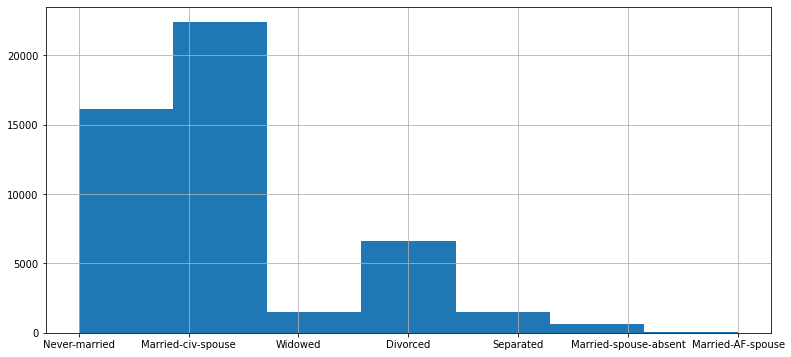

In [84]:
Income['marital-status'].hist(figsize=(13,6), bins=7)

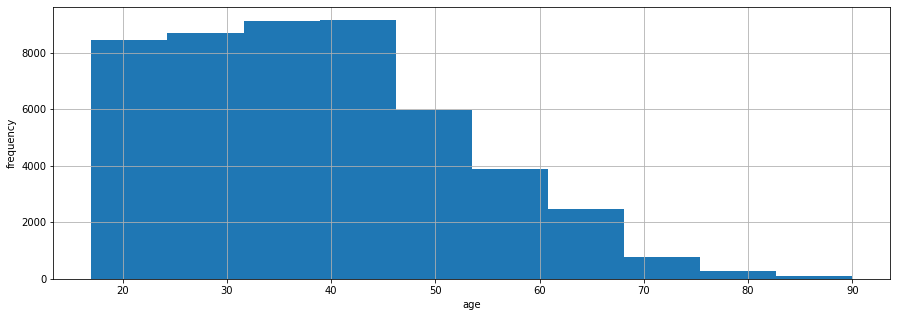

In [89]:
Income['age'].hist(figsize=(15,5))
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

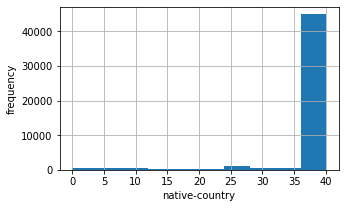

In [141]:
Income['native-country'].hist(figsize=(5,3))
plt.xlabel('native-country')
plt.ylabel('frequency')
plt.show()

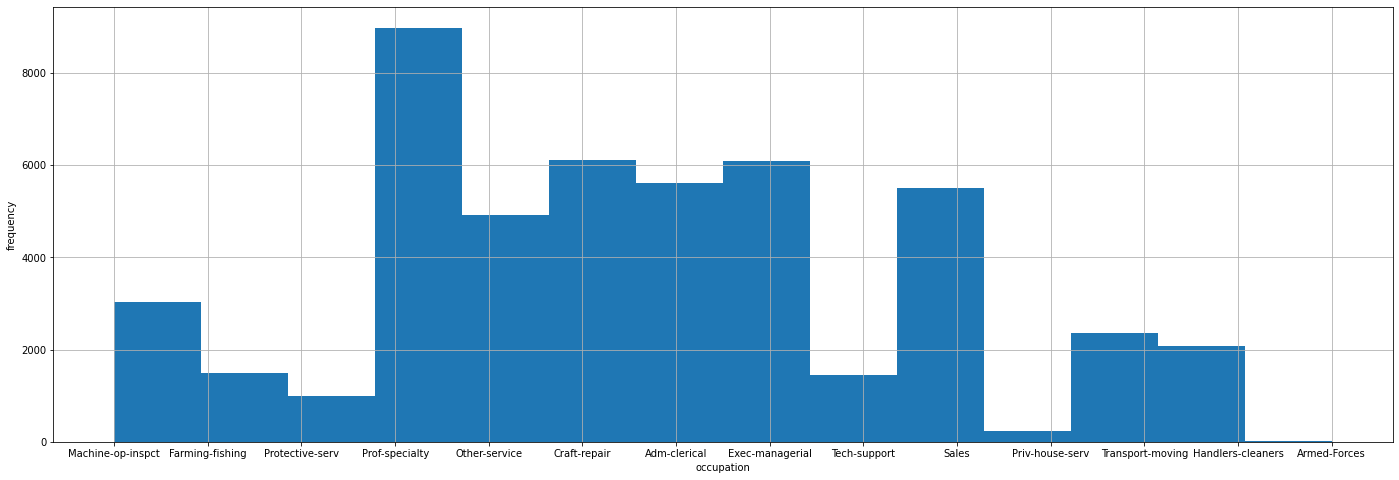

In [107]:
Income['occupation'].hist(figsize=(24,8), bins=14)
plt.xlabel('occupation')
plt.ylabel('frequency')
plt.show()

In [113]:
#Assigning the numeric values to the string type variables
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
Income['workclass'] = number.fit_transform(Income['workclass'])
Income['education'] = number.fit_transform(Income['education'])
Income['marital-status'] = number.fit_transform(Income['marital-status'])
Income['occupation'] = number.fit_transform(Income['occupation'])
Income['relationship'] = number.fit_transform(Income['relationship'])
Income['race'] = number.fit_transform(Income['race'])
Income['gender'] = number.fit_transform(Income['gender'])
Income['native-country'] = number.fit_transform(Income['native-country'])
Income['income'] = number.fit_transform(Income['income'])


In [114]:
Income.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,25,3,226802,1,4,6,3,2,1,0,0,40,38,0,7
1,38,3,89814,11,2,4,0,4,1,0,0,50,38,0,9
2,28,1,336951,7,2,10,0,4,1,0,0,40,38,1,12
3,44,3,160323,15,2,6,0,2,1,7688,0,40,38,1,10
4,18,3,103497,15,4,9,3,4,0,0,0,30,38,0,10


In [151]:
#creating two classes '<=50k' and '>50k'
Income.loc[Income['income'] == ' >50K', 'income'] = 1
Income.loc[Income['income'] == ' <=50K', 'income'] = 0

In [152]:
y = Income["income"]
X = Income.drop(["income"], axis=1)
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,education-num
0,25,3,226802,1,4,6,3,2,1,0,0,40,38,7
1,38,3,89814,11,2,4,0,4,1,0,0,50,38,9
2,28,1,336951,7,2,10,0,4,1,0,0,40,38,12
3,44,3,160323,15,2,6,0,2,1,7688,0,40,38,10
4,18,3,103497,15,4,9,3,4,0,0,0,30,38,10


In [153]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [155]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [156]:
X_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,education-num
0,-0.849978,-1.887643,-0.551219,1.212393,-0.406325,-1.554732,0.969833,0.390646,-1.425582,-0.144199,-0.216492,-0.034027,0.258084,-0.027733
1,0.241031,-0.094859,1.687545,-2.650223,-0.406325,-1.049322,0.969833,-0.797592,0.701468,-0.144199,-0.216492,0.207331,0.258084,-1.587187
2,-0.486308,1.697924,-1.434052,-0.590161,-0.406325,-0.543912,-0.899325,0.390646,0.701468,0.850561,-0.216492,2.379553,0.258084,0.362131
3,-0.195373,-0.094859,-0.384485,1.212393,0.922720,-0.796617,-0.276272,0.390646,-1.425582,-0.144199,-0.216492,1.575026,0.258084,-0.027733
4,-0.704510,-0.094859,1.608144,0.182362,1.587242,1.730434,1.592886,0.390646,-1.425582,-0.144199,-0.216492,-0.838553,0.258084,-0.417596


In [157]:
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier #Random_forest
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.naive_bayes import GaussianNB #Naive_bayes
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [158]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
score_DT = DT.score(X_test,y_test)
print("The accuracy of the Decision tree model is ",score_DT)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Decision tree model is  0.815327919197434
              precision    recall  f1-score   support

       <=50k       0.88      0.88      0.88     11138
        >50k       0.61      0.63      0.62      3515

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653



In [159]:
y_pred[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Recall: Number of items correctly identified as positive out of total true positives

Precision: Number of items correctly identified as positive out of total items identified as positive- TP/(TP+FP)

f1-score:It is a harmonic mean of precision and recall given by- f1 = 2*Precision*Recall/(Precision + Recall)


In [160]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the KNN Model is 0.8280215655497167
              precision    recall  f1-score   support

       <=50k       0.87      0.90      0.89     11138
        >50k       0.66      0.58      0.62      3515

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.82      0.83      0.82     14653



In [161]:
y_pred[0:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [162]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score_LR = LR.score(X_test,y_test)
print('The accuracy of the Logistic Regression model is', score_LR)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Logistic Regression model is 0.8221524602470484
              precision    recall  f1-score   support

       <=50k       0.84      0.94      0.89     11138
        >50k       0.70      0.45      0.55      3515

    accuracy                           0.82     14653
   macro avg       0.77      0.69      0.72     14653
weighted avg       0.81      0.82      0.81     14653



In [163]:
y_pred[0:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [164]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
score_RF = RF.score(X_test,y_test)
print('The accuracy of the Random Forest model is', score_RF)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Random Forest model is 0.856548147137105
              precision    recall  f1-score   support

       <=50k       0.89      0.93      0.91     11138
        >50k       0.74      0.62      0.68      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [165]:
y_pred[0:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [166]:
!pip install texttable


In [167]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression',score_LR],['RandomForest', score_RF],['DecisionTree',score_DT],['K-NearestNeighbors',score_knn]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+--------------------+----------+
|   CLASSIFICATION   | ACCURACY |
+====================+==========+
| LogisticRegression | 0.822    |
+--------------------+----------+
| RandomForest       | 0.857    |
+--------------------+----------+
| DecisionTree       | 0.815    |
+--------------------+----------+
| K-NearestNeighbors | 0.828    |
+--------------------+----------+
